In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# DF 불러오고 합치기

In [7]:
# df_ins = pd.read_csv("./02_Data_set_보험.csv" ,encoding = "euc-kr")
# df_loan = pd.read_csv("./01_Data_set_대출.csv",encoding = "euc-kr")
df = pd.read_csv("~/Desktop/Total_0823.csv")


In [246]:
# df = pd.merge(df_ins,df_loan, on = ['CUST_ID'])

In [8]:
df.isnull().sum()

Unnamed: 0           0
CUST_ID              0
OCCP_NAME_G          0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_GRAD       0
PREM_OVDU_RATE       0
LT1Y_PEOD_RATE       0
AVG_STLN_RATE        0
STLN_REMN_AMT        0
LT1Y_STLN_AMT        0
LT1Y_SLOD_RATE       0
GDINS_MON_PREM       0
SVINS_MON_PREM       0
FMLY_GDINS_MNPREM    0
FMLY_SVINS_MNPREM    0
MAX_MON_PREM         0
TOT_PREM             0
FMLY_TOT_PREM        0
CNTT_LAMT_CNT        0
LT1Y_CTLT_CNT        0
AUTR_FAIL_MCNT       0
FYCM_PAID_AMT        0
FMLY_CLAM_CNT        0
FMLY_PLPY_CNT        0
AGE                  0
SEX                  0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CN

In [208]:
df['AGE']

0         50
1         50
2         60
3         35
4         45
          ..
100228    55
100229    45
100230    45
100231    45
100232    55
Name: AGE, Length: 99769, dtype: object

In [199]:
df.isnull().sum()

CUST_ID                 0
OCCP_NAME_G             0
CUST_JOB_INCM           0
HSHD_INFR_INCM          0
ACTL_FMLY_NUM           0
CUST_FMLY_NUM           0
LAST_CHLD_AGE        1027
MATE_JOB_INCM           0
CRDT_LOAN_CNT           0
MIN_CNTT_DATE           0
TOT_CRLN_AMT            0
TOT_REPY_AMT            0
CRLN_OVDU_RATE          0
CRLN_30OVDU_RATE        0
LT1Y_CLOD_RATE          0
STRT_CRDT_GRAD          0
LTST_CRDT_GRAD          0
PREM_OVDU_RATE          0
LT1Y_PEOD_RATE          0
AVG_STLN_RATE           0
STLN_REMN_AMT           0
LT1Y_STLN_AMT           0
LT1Y_SLOD_RATE          0
GDINS_MON_PREM          0
SVINS_MON_PREM          0
FMLY_GDINS_MNPREM       0
FMLY_SVINS_MNPREM       0
MAX_MON_PREM            0
TOT_PREM                0
FMLY_TOT_PREM           0
CNTT_LAMT_CNT           0
LT1Y_CTLT_CNT           0
AUTR_FAIL_MCNT          0
FYCM_PAID_AMT           0
FMLY_CLAM_CNT           0
FMLY_PLPY_CNT           0
AGE                     0
SEX                     0
TARGET      

# 직업별 실효해지건수 분석

In [6]:
df['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

In [7]:
# 직업별 실효해지건수 
job_lamt = df_ins.groupby('OCCP_NAME_G')[['CNTT_LAMT_CNT','CUST_JOB_INCM']].mean()
job_lamt = job_lamt.reset_index().round(3)
job_lamt.corr()

,CNTT_LAMT_CNT,CUST_JOB_INCM
CNTT_LAMT_CNT,1.000000,-0.235184
CUST_JOB_INCM,-0.235184,1.000000


In [8]:
# 직업별 실효해지건수 
job_lamt = df_ins.groupby('OCCP_NAME_G')[['CNTT_LAMT_CNT','CUST_JOB_INCM']].mean()
job_lamt = job_lamt.reset_index().round(3)
job_lamt

,OCCP_NAME_G,CNTT_LAMT_CNT,CUST_JOB_INCM
0,*,0.119,3236.417
1,1차산업 종사자,0.098,2995.671
2,2차산업 종사자,0.111,4014.707
3,3차산업 종사자,0.170,3492.350
4,고소득 전문직,0.048,6223.549
5,공무원,0.078,4189.550
6,기업/단체 임원,0.073,6808.453
7,기타,0.105,0.000
8,단순 노무직,0.135,2435.810
9,단순 사무직,0.131,3947.212


In [9]:
job_lamt.drop([0,7,15,16], inplace=True)
# 주부, 학생, 기타 직업에 대한 로우 삭제 
# -> 주부와 학생은 자신들의 소득으로 생계를 유지하는 것이 아니며 기타는 그 소득의 근원을 모르기에 삭제하여 상관계수의 유의미성을 확보 

In [10]:
job_lamt.corr()

,CNTT_LAMT_CNT,CUST_JOB_INCM
CNTT_LAMT_CNT,1.000000,-0.634241
CUST_JOB_INCM,-0.634241,1.000000


In [11]:
job_lamt.to_csv('./직업별해지건수_소득.csv', encoding = 'euc-kr')

In [12]:
df = pd.merge(df_ins,df_loan, on = ['CUST_ID'])

# 막내자녀나이 결측치 처리

In [13]:
df_ins[(df_ins['LAST_CHLD_AGE']==0.0) & (df_ins['AGE']=='35')]['LAST_CHLD_AGE'].replace({0.0:18.0}, inplace=True)

In [14]:
df_ins[df_ins['AGE']=='35']

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
3,4,학생,0,10100,2,1,0.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
20,21,학생,0,0,3,1,0.0,NaN,0,0,...,1000000,1000000,0,0,0,0,0,0,35,1
21,22,주부,0,6000,3,2,4.0,NaN,0,0,...,6000000,30000000,0,0,0,14600000,31,0,35,2
36,37,주부,0,4600,3,1,34.0,NaN,0,0,...,5000000,5000000,0,0,0,25300000,2,0,35,1
41,42,단순 사무직,3900,10000,4,2,0.0,사무직,6200,0,...,15000000,22000000,0,0,2,7500000,10,2,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100177,102196,사무직,3200,3200,1,1,0.0,NaN,0,0,...,0,0,0,0,0,0,0,0,35,1
100184,102203,주부,0,10600,4,1,24.0,자영업,5900,0,...,45000000,45000000,0,0,1,4000000,3,1,35,2
100205,102225,단순 사무직,4000,7000,1,1,0.0,NaN,0,0,...,21000000,21000000,1,0,1,0,0,0,35,2
100216,102236,사무직,4000,5900,2,1,0.0,NaN,0,0,...,2000000,2000000,0,0,0,0,0,0,35,1


In [15]:
for i in range(len(df_ins['LAST_CHLD_AGE'])):
    # 나이 35인 사람에 대해 막내자녀 결측치 처리 (18 대체)
    if (df_ins.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df_ins.loc[i, 'AGE'] == '35'):
        df_ins.loc[i, 'LAST_CHLD_AGE'] = 18
    # 나이 40인 사람에 대해 막내자녀 결측치 처리 (17 대체)
    if (df_ins.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df_ins.loc[i, 'AGE'] == '40'):
        df_ins.loc[i, 'LAST_CHLD_AGE'] = 17


# 보험.csv 슬라이드 3 결측치 처리

In [16]:
# 보험료 연체율
df['PREM_OVDU_RATE'].value_counts()

0      27233
1       9094
2       8970
3       6362
4       5324
       ...  
82         8
85         8
99         7
96         4
100        4
Name: PREM_OVDU_RATE, Length: 93, dtype: int64

## 파생변수 생성 (예상 타겟변수_실효해지건수)

In [174]:
# 'CNTT_LAMT_CNT' - 실효해지건수 파생변수 생성
_list = []
for cnt in df['CNTT_LAMT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target"] = _list

# 'LT1Y_CTLT_CNT' - 최근 1년 실효해지건수 파생변수 생성
_list = []
for cnt in df['LT1Y_CTLT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target_year"] = _list


In [18]:
df['Target'].describe()

count    100233.000000
mean          0.083037
std           0.275939
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [19]:
df['Target'].value_counts()

0    91910
1     8323
Name: Target, dtype: int64

In [20]:
df['Target_year'].value_counts()

0    98556
1     1677
Name: Target_year, dtype: int64

## 직업별 추정소득 분포 확인

In [131]:
# 직업의 결측치, * 값을 가진 인덱스 추출
idx = df[df['OCCP_NAME_G']=='*'].index
idx

Int64Index([    22,     23,    103,    114,    165,    276,    288,    326,
               385,    498,
            ...
             99118,  99155,  99234,  99542,  99568,  99647,  99839,  99864,
             99911, 100226],
           dtype='int64', length=1189)

In [132]:
# 직업 결측치 삭제하여 새로운 df에 저장
df1 = df.drop(idx)

In [82]:
# 소득의 결측치 인덱스 반환
idx = df1[df1['CUST_JOB_INCM']==0].index
idx

Int64Index([     2,      3,      6,      7,      8,     10,     11,     12,
                14,     15,
            ...
            100199, 100200, 100206, 100207, 100212, 100213, 100215, 100218,
            100219, 100223],
           dtype='int64', length=39248)

In [83]:
# 소득 결측치 제거 
df1 = df1.drop(idx)

In [84]:
df1[['OCCP_NAME_G','CUST_JOB_INCM']]

,OCCP_NAME_G,CUST_JOB_INCM
0,공무원,5400
1,자영업,5500
4,공무원,4800
5,3차산업 종사자,4400
9,단순 사무직,4700
...,...,...
100228,자영업,5500
100229,운전직,4600
100230,자영업,4800
100231,사무직,4200


In [133]:
df[(df['OCCP_NAME_G']=='*') & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
276,280,*,4200,9500,5,2,NaN,*,5400,0,...,0,90001,0,0,5,121,0,0,1,1
665,673,*,0,6100,4,3,NaN,*,0,0,...,69001,0,85,0,2,121,4,770001,1,0
1527,1561,*,4500,10000,4,1,NaN,*,5500,0,...,426001,0,97,0,3,121,0,0,1,0
2399,2450,*,0,8400,2,1,NaN,*,0,0,...,27001,0,37,0,1,121,0,0,1,0
6452,6573,*,8400,20000,3,1,NaN,*,10000,0,...,12001,0,25,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94519,96441,*,5200,10100,3,2,NaN,*,5000,0,...,0,18001,1,25,1,13,0,0,1,0
96423,98379,*,0,0,3,2,0.0,NaN,0,0,...,1,0,1,0,0,0,0,0,1,1
98941,100943,*,5700,9900,5,2,NaN,*,4300,0,...,0,0,121,121,0,0,0,0,1,0
99118,101122,*,0,5600,4,1,NaN,*,0,4,...,96001,0,1,0,5,121,0,0,1,0


In [85]:
# 직업이 기타인 행의 소득은 모두 0임 (1672개) -> 전체 데이터의 5프로보다 작은 값이므로 이에 대해 삭제할 수 있다고 판단
# 하지만 그 전에 Target의 값이 1인 소중한 경우들이 몇개인지 확인 -> 133개 (Target 1인 값 : 8323개)
# 따라서 직업이 기타인 행은 전부 삭제하겠다고 판단.
df[(df['OCCP_NAME_G']=='기타') & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
917,935,기타,0,5100,4,2,44.0,기업/단체 임원,0,0,...,0,6001,1,1,4,121,0,0,1,0
4607,4696,기타,0,5900,5,3,34.0,NaN,0,0,...,0,18001,0,1,2,121,1,1,1,1
5400,5501,기타,0,2400,4,2,44.0,NaN,0,0,...,15001,1,25,37,5,121,0,0,1,0
5820,5928,기타,0,4000,3,2,44.0,전문직,0,0,...,12001,1,25,0,3,97,0,0,1,0
5864,5973,기타,0,3400,2,2,0.0,NaN,0,0,...,3001,0,109,0,2,121,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98526,100522,기타,0,0,2,1,44.0,NaN,0,0,...,18001,0,0,0,1,97,0,0,1,0
98633,100632,기타,0,3600,4,3,44.0,NaN,0,4,...,0,0,121,121,0,0,0,0,1,0
99470,101479,기타,0,4400,4,1,34.0,NaN,0,0,...,15001,0,1,0,1,97,0,0,1,0
99845,101857,기타,0,4200,4,3,39.0,단순 노무직,0,0,...,24001,0,13,0,2,13,0,0,1,1


In [86]:
job = ['사무직', '2차산업 종사자','자영업','3차산업 종사자','전문직','공무원','단순 사무직','운전직','고소득 전문직','기업/단체 임원',
       '예체능계 종사자', '1차산업 종사자','단순 노무직','주부','학생']

In [128]:
df['OCCP_NAME_G'].value_counts()

3600        32706
사무직         15272
2차산업 종사자     8448
자영업          7782
3차산업 종사자     7070
전문직          4734
공무원          4582
단순 사무직       3970
운전직          1737
5000         1506
1차산업 종사자     1159
4900         1133
고소득 전문직      1063
4000         1061
4400          953
예체능계 종사자      912
기업/단체 임원      876
*             748
단순 노무직        526
4600          479
4700          351
4500          231
8400          155
7000          151
주부             49
학생             27
Name: OCCP_NAME_G, dtype: int64

In [75]:
df['OCCP_NAME_G'].value_counts()

주부          27125
사무직         16405
2차산업 종사자     9401
자영업          9288
3차산업 종사자     8072
공무원          5061
전문직          4965
단순 사무직       4029
학생           3729
운전직          2088
기타           1650
고소득 전문직      1214
1차산업 종사자     1159
기업/단체 임원     1031
예체능계 종사자      912
단순 노무직        804
*             748
Name: OCCP_NAME_G, dtype: int64

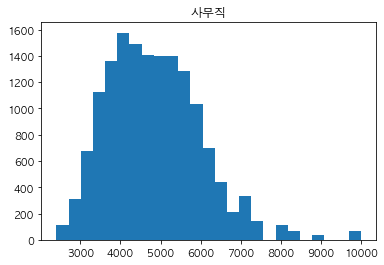

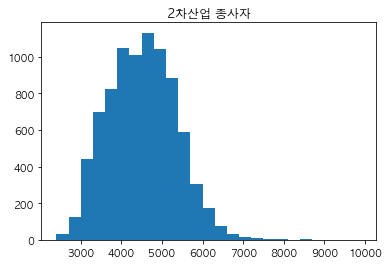

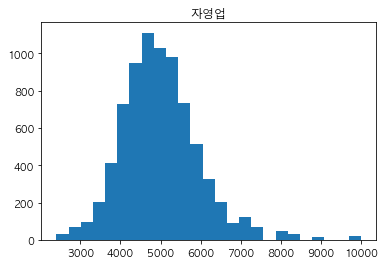

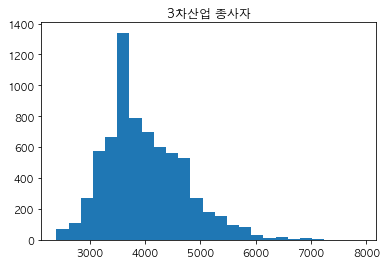

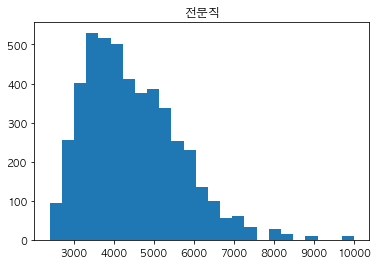

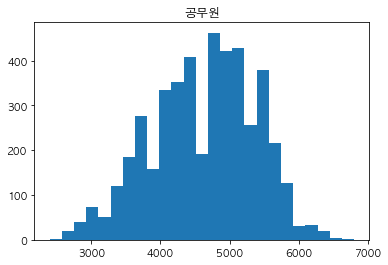

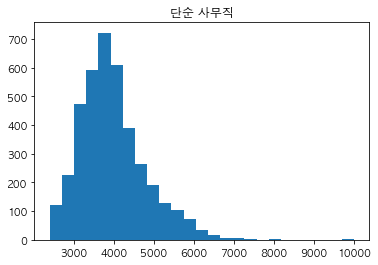

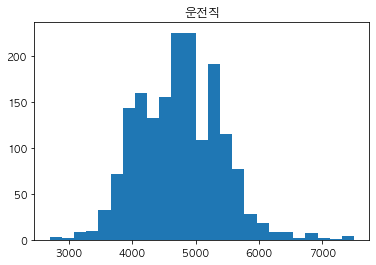

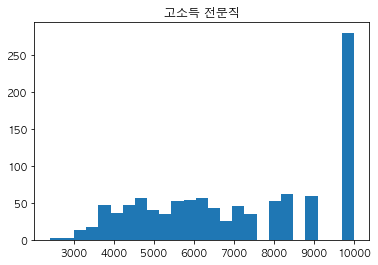

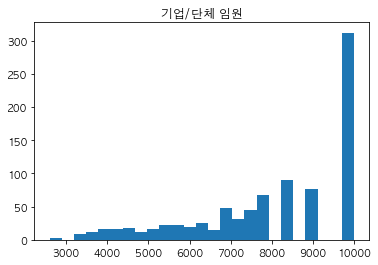

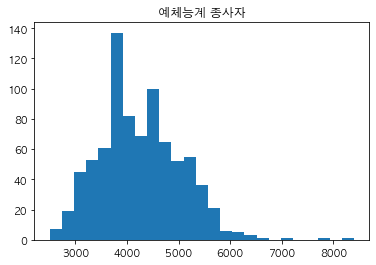

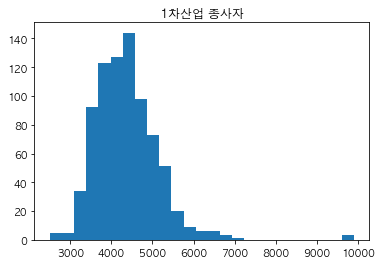

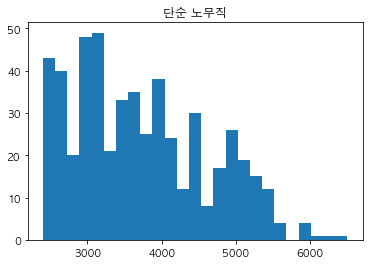

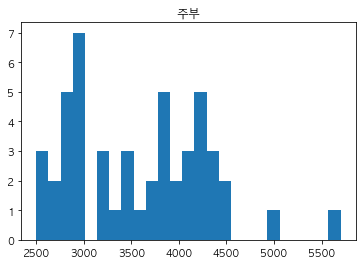

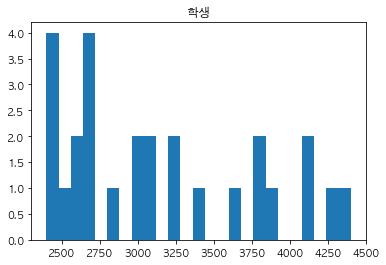

In [93]:
# 정규성 검정 전 1차적 확인으로 hist 
for j in job:
    plt.hist(df1[df1['OCCP_NAME_G'] == j]['CUST_JOB_INCM'], bins=25)
    plt.title(j)
    plt.show()

In [104]:
df1.groupby('OCCP_NAME_G')['CUST_JOB_INCM'].agg(['mean','median']).round(3)

,mean,median
OCCP_NAME_G,,
1차산업 종사자,4337.250,4300.0
2차산업 종사자,4465.909,4500.0
3차산업 종사자,3983.720,3900.0
고소득 전문직,7107.526,7000.0
공무원,4628.416,4700.0
기업/단체 임원,8019.863,8400.0
단순 노무직,3719.011,3600.0
단순 사무직,4006.398,3900.0
사무직,4860.915,4800.0


### 정규성을 따진 후 평균이나 중앙값으로 소득 결측치 채우기 


-  정규성 (평균)
    - 사무직  4900
	- 2차산업 종사자 4400
	 - 자영업 5000
	- 3차산업 종사자 4000
	-  공무원 4600
	- 단순 사무직 4000
	- 예체능계 종사자 4200
	- 운전직 4700
	- 전문직 4500
	- 1차산업 종사자 4300
	- 





- 비정규성 (중앙값)
    - 학생 3000
    - 주부 3600
    - 단순 노무직 3600
    - 기업/단체 임원 8400
    - 고속득 전문직 7000


In [176]:
# 직업이 * 이나 기타로 기재된 값들에 대해 아에 제외처리함 (위에서 Target 1의 개수 확인 O)
idx = df[df['OCCP_NAME_G']=='*'].index
idx
df.drop(idx, inplace=True)

idx = df[df['OCCP_NAME_G']=='기타'].index
idx
df.drop(idx, inplace=True)

In [164]:
# 비정규성(중앙값 대체)
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '기타')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '주부')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '학생')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 노무직')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '기업/단체 임원')]= 8400
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '고소득 전문직')] = 7000

# 정규성(평균값 대체)
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '사무직')] = 4900
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '2차산업 종사자')] = 4400
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '자영업')] = 5000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '3차산업 종사자')] = 4000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '공무원')]= 4600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 노무직')] = 3700
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 사무직')]= 4000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '예체능계 종사자')]= 4200
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '운전직')]= 4700
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '전문직')]= 4500
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '1차산업 종사자')] = 4000

In [165]:
df[df['CUST_JOB_INCM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
363,368,NaN,0,2400,1,1,0.0,NaN,0,0,...,246001,0,1,0,2,121,0,0,0,0
634,642,NaN,0,5600,1,1,0.0,NaN,0,0,...,0,18001,1,25,1,37,0,0,0,0
1361,1392,NaN,0,6600,1,1,0.0,NaN,0,0,...,9001,3001,1,0,5,121,0,0,0,0
3568,3640,NaN,0,10900,1,1,0.0,NaN,0,0,...,0,0,1,97,0,0,0,0,0,0
3751,3827,NaN,0,6200,2,1,0.0,2차산업 종사자,0,0,...,0,1,0,0,2,97,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94531,96453,NaN,0,0,1,1,17.0,NaN,0,0,...,0,30001,37,37,1,37,0,0,0,0
95194,97128,NaN,0,0,2,1,0.0,주부,0,0,...,0,0,1,49,2,49,0,0,0,0
95779,97726,NaN,0,4200,1,1,0.0,NaN,0,0,...,63001,0,1,0,2,85,0,0,0,0
97235,99206,NaN,0,11900,2,1,0.0,3차산업 종사자,4200,0,...,0,0,1,121,0,0,0,0,0,0


In [185]:
df["OCCP_NAME_G"].isna().sum()

464

In [168]:
df["OCCP_NAME_G"].value_counts(dropna=False)

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
NaN           464
Name: OCCP_NAME_G, dtype: int64

In [166]:
df["CUST_JOB_INCM"].value_counts()

3600     33523
4000      3662
5000      3395
4900      3149
4400      3108
4600      2517
4700      2480
4500      2402
4100      2308
4200      2292
4300      2162
3800      2151
3900      2147
3700      2022
4800      2016
5100      1852
5200      1752
5300      1725
3500      1658
5400      1611
3400      1534
5500      1407
3300      1364
5600      1253
3200      1216
5700      1045
3100       962
5800       942
5900       799
3000       793
6000       739
6100       568
6200       536
7000       519
2900       497
6800       461
8400       425
6300       416
6400       399
2800       388
10000      378
7500       345
7900       320
9900       318
7200       304
6500       290
2700       277
6600       265
8900       203
2600       194
2500       113
2400        98
0           72
Name: CUST_JOB_INCM, dtype: int64

In [136]:
df[df['CUST_JOB_INCM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
2,3,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,...,0,3001,1,25,4,121,0,0,0,0
3,4,학생,0,10100,2,1,18.0,NaN,0,0,...,0,3001,1,25,4,61,0,0,0,0
6,7,주부,0,7700,5,3,19.0,2차산업 종사자,4400,1,...,0,9001,121,121,2,121,1,6001,0,0
7,8,기업/단체 임원,0,10300,3,1,24.0,사무직,5000,0,...,3001,0,1,0,2,121,0,0,0,0
8,9,주부,0,7600,4,1,9.0,전문직,5400,0,...,273001,0,37,0,5,121,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100213,102233,자영업,0,10400,3,1,0.0,자영업,4200,2,...,9001,12001,0,0,2,121,0,0,1,0
100215,102235,학생,0,7400,1,1,0.0,NaN,0,1,...,18001,3001,1,1,1,13,0,0,0,0
100218,102238,주부,0,5200,2,2,34.0,NaN,0,2,...,1,3001,25,121,1,61,0,0,0,0
100219,102239,주부,0,10200,4,1,29.0,고소득 전문직,0,0,...,3001,6001,1,1,1,121,0,0,0,0


In [30]:
age = [20,25,30,35,40,45,50,55,60,65,70]

In [32]:
from scipy.stats import shapiro

for j in job:
    _a = df1[df1['OCCP_NAME_G'] == j]['CUST_JOB_INCM']
    statistic, p = shapiro(_a)
    print(f"{j} : Shapiro Wilk Test: statistic = {statistic}, p-value={round(p,3)}")

사무직 : Shapiro Wilk Test: statistic = 0.9662870168685913, p-value=0.0
2차산업 종사자 : Shapiro Wilk Test: statistic = 0.9894324541091919, p-value=0.0
자영업 : Shapiro Wilk Test: statistic = 0.9627121090888977, p-value=0.0
3차산업 종사자 : Shapiro Wilk Test: statistic = 0.9673349857330322, p-value=0.0
전문직 : Shapiro Wilk Test: statistic = 0.9527883529663086, p-value=0.0
공무원 : Shapiro Wilk Test: statistic = 0.9878714084625244, p-value=0.0
단순 사무직 : Shapiro Wilk Test: statistic = 0.9467166066169739, p-value=0.0
운전직 : Shapiro Wilk Test: statistic = 0.9858201146125793, p-value=0.0
고소득 전문직 : Shapiro Wilk Test: statistic = 0.9114609956741333, p-value=0.0
기업/단체 임원 : Shapiro Wilk Test: statistic = 0.8812787532806396, p-value=0.0
예체능계 종사자 : Shapiro Wilk Test: statistic = 0.9772247076034546, p-value=0.0
1차산업 종사자 : Shapiro Wilk Test: statistic = 0.9056349396705627, p-value=0.0
단순 노무직 : Shapiro Wilk Test: statistic = 0.9531296491622925, p-value=0.0
주부 : Shapiro Wilk Test: statistic = 0.9364492893218994, p-value=0.01

In [33]:
df1['AGE'] = df1['AGE'].astype('int')

In [34]:
df1['AGE']

0         50
1         50
4         45
5         45
9         40
          ..
100228    55
100229    45
100230    45
100231    45
100232    55
Name: AGE, Length: 59155, dtype: int64

In [35]:
df1['SEX'].value_counts() # 남 1, 여 2

2    32057
1    27098
Name: SEX, dtype: int64

In [36]:
df1['SEX'] = df1['SEX'].astype('int')

In [37]:
from sklearn.preprocessing import LabelEncoder

job = df1['OCCP_NAME_G']
par_job = df1['MATE_OCCP_NAME_G']


encoder = LabelEncoder()

encoder.fit(job)
labels = encoder.transform(job)
df1['OCCP_NAME_G'] = labels


encoder.fit(par_job)
labels = encoder.transform(par_job)
df1['MATE_OCCP_NAME_G'] = labels

In [38]:
df1['LT1Y_PEOD_RATE'].value_counts()

0       42976
10미만     7427
20미만     4380
30미만     1804
40미만     1061
50미만      493
60미만      421
90미만      407
90이상      186
Name: LT1Y_PEOD_RATE, dtype: int64

In [39]:
df1['LT1Y_PEOD_RATE'] = df1['LT1Y_PEOD_RATE'].str.replace('미만','')
df1['LT1Y_PEOD_RATE'] = df1['LT1Y_PEOD_RATE'].str.replace('이상','')
df1['LT1Y_PEOD_RATE'] = df1['LT1Y_PEOD_RATE'].astype('int')

In [40]:
df1['LT1Y_PEOD_RATE'].value_counts()

0     42976
10     7427
20     4380
30     1804
40     1061
90      593
50      493
60      421
Name: LT1Y_PEOD_RATE, dtype: int64

In [41]:
df1

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
0,1,4,5400,7700,4,1,24.0,14,0,0,...,9001,0,1,0,2,13,3,420001,0,0
1,2,11,5500,8100,4,2,29.0,14,0,0,...,24001,0,0,0,2,121,0,0,0,0
4,5,4,4800,4800,4,1,14.0,14,0,0,...,21001,0,1,0,1,97,0,0,0,0
5,6,2,4400,7700,2,2,0.0,8,3300,0,...,111001,0,1,1,4,121,0,0,0,0
9,10,7,4700,12400,4,1,14.0,5,7500,0,...,0,9001,1,1,3,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,11,5500,12900,3,3,34.0,12,0,0,...,57001,0,37,109,5,121,0,0,0,0
100229,102249,10,4600,9800,5,2,19.0,0,5200,0,...,54001,0,85,0,6,121,0,0,0,0
100230,102250,11,4800,10400,4,2,14.0,11,5600,0,...,27001,0,1,0,2,121,0,0,0,0
100231,102251,8,4200,4200,1,1,0.0,16,0,0,...,0,0,1,1,3,121,0,0,0,0


In [42]:
idx = df1[df1['LT1Y_PEOD_RATE'] == 60].index

df1.drop(idx, inplace=True)

In [43]:
idx = df1[df1['LT1Y_PEOD_RATE'] == 90].index

df1.drop(idx, inplace=True)

In [44]:
df1['LT1Y_PEOD_RATE'].replace({10:5, 20:15, 30:25, 40:35, 50:45})

0         15
1          0
4          0
5          0
9          5
          ..
100228     5
100229     0
100230     0
100231     0
100232     0
Name: LT1Y_PEOD_RATE, Length: 58141, dtype: int64

In [45]:
df[(df['LT1Y_PEOD_RATE']== 60) & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year


In [46]:
df[(df['LT1Y_PEOD_RATE']== 90) & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year


In [47]:
# 연체율이 50 이상이 될 수 없으므로 (최대 퐁당퐁당 50임) 60, 90인거 제외함

In [48]:
df1

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
0,1,4,5400,7700,4,1,24.0,14,0,0,...,9001,0,1,0,2,13,3,420001,0,0
1,2,11,5500,8100,4,2,29.0,14,0,0,...,24001,0,0,0,2,121,0,0,0,0
4,5,4,4800,4800,4,1,14.0,14,0,0,...,21001,0,1,0,1,97,0,0,0,0
5,6,2,4400,7700,2,2,0.0,8,3300,0,...,111001,0,1,1,4,121,0,0,0,0
9,10,7,4700,12400,4,1,14.0,5,7500,0,...,0,9001,1,1,3,25,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,11,5500,12900,3,3,34.0,12,0,0,...,57001,0,37,109,5,121,0,0,0,0
100229,102249,10,4600,9800,5,2,19.0,0,5200,0,...,54001,0,85,0,6,121,0,0,0,0
100230,102250,11,4800,10400,4,2,14.0,11,5600,0,...,27001,0,1,0,2,121,0,0,0,0
100231,102251,8,4200,4200,1,1,0.0,16,0,0,...,0,0,1,1,3,121,0,0,0,0


In [49]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

target = df1['CUST_JOB_INCM']
x_data = df1.drop(['CUST_JOB_INCM','CUST_ID'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, target, test_size=0.3, random_state=0)


lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, n_jobs = -1)

lgbm_reg.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=1000, num_leaves=4)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score


pred = lgbm_reg.predict(x_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(round(mse,3), round(r2,3))

409389.499 0.714


In [51]:
df1.corr()['CUST_JOB_INCM'].sort_values(ascending=False)

CUST_JOB_INCM        1.000000
HSHD_INFR_INCM       0.513640
AGE                  0.282064
TOT_PREM             0.229665
MAX_MON_PREM         0.224027
SVINS_MON_PREM       0.214338
FMLY_TOT_PREM        0.181542
FMLY_SVINS_MNPREM    0.175992
LAST_CHLD_AGE        0.136128
FMLY_PLPY_CNT        0.131592
CTCD_OCCR_MDIF       0.107172
OCCP_NAME_G          0.105179
ACTL_FMLY_NUM        0.083615
GDINS_MON_PREM       0.076772
FMLY_GDINS_MNPREM    0.065893
STLN_REMN_AMT        0.059454
LT1Y_STLN_AMT        0.057647
CRDT_CARD_CNT        0.041327
TOT_LNIF_AMT         0.040805
CRDT_OCCR_MDIF       0.040325
MATE_JOB_INCM        0.039914
SPTCT_OCCR_MDIF      0.036439
TOT_CRLN_AMT         0.035774
TOT_REPY_AMT         0.033315
BNK_LNIF_AMT         0.029109
CB_GUIF_CNT          0.024484
CUST_FMLY_NUM        0.023777
CB_GUIF_AMT          0.023448
ECT_LNIF_CNT         0.022215
TOT_CLIF_AMT         0.018219
BNK_LNIF_CNT         0.011002
MIN_CNTT_DATE        0.007731
CUST_ID              0.003481
SPART_LNIF

In [52]:
idx = df1[df1['CUST_JOB_INCM']==0].index

df2 = df1.iloc[idx]
df2

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year


# df 변경(전처리)

In [248]:
idx = df[df['OCCP_NAME_G'].isnull()].index
# 직업에 대한 값이 null인 행 제거 
df.drop(idx, inplace=True)

df.drop('MATE_OCCP_NAME_G', axis=1, inplace=True)
df.isnull().sum().sort_values(ascending=False)
# 이제 막내자녀나이에 대한 null밖에 없음 

LAST_CHLD_AGE        1027
CUST_ID                 0
CPT_LNIF_CNT            0
FMLY_TOT_PREM           0
CNTT_LAMT_CNT           0
LT1Y_CTLT_CNT           0
AUTR_FAIL_MCNT          0
FYCM_PAID_AMT           0
FMLY_CLAM_CNT           0
FMLY_PLPY_CNT           0
AGE                     0
SEX                     0
TARGET                  0
BNK_LNIF_CNT            0
SPART_LNIF_CNT          0
MAX_MON_PREM            0
ECT_LNIF_CNT            0
TOT_LNIF_AMT            0
TOT_CLIF_AMT            0
BNK_LNIF_AMT            0
CPT_LNIF_AMT            0
CRDT_OCCR_MDIF          0
SPTCT_OCCR_MDIF         0
CRDT_CARD_CNT           0
CTCD_OCCR_MDIF          0
CB_GUIF_CNT             0
TOT_PREM                0
FMLY_SVINS_MNPREM       0
OCCP_NAME_G             0
CRLN_30OVDU_RATE        0
CUST_JOB_INCM           0
HSHD_INFR_INCM          0
ACTL_FMLY_NUM           0
CUST_FMLY_NUM           0
MATE_JOB_INCM           0
CRDT_LOAN_CNT           0
MIN_CNTT_DATE           0
TOT_CRLN_AMT            0
TOT_REPY_AMT

In [249]:
df['SEX'].value_counts()

2    54221
1    45118
*      430
Name: SEX, dtype: int64

In [250]:
idx = df[df['SEX'] == '*'].index

df.drop(idx, inplace=True)

In [251]:
df['AGE'] = df['AGE'].astype('int')
df['SEX'] = df['SEX'].astype('int')

In [252]:
df['LT1Y_PEOD_RATE'] = df['LT1Y_PEOD_RATE'].str.replace('미만','')
df['LT1Y_PEOD_RATE'] = df['LT1Y_PEOD_RATE'].str.replace('이상','')
df['LT1Y_PEOD_RATE'] = df['LT1Y_PEOD_RATE'].astype('int')



In [253]:
idx = df[df['LT1Y_PEOD_RATE'] == 60].index

df.drop(idx, inplace=True)

In [254]:
idx = df[df['LT1Y_PEOD_RATE'] == 90].index

df.drop(idx, inplace=True)

In [255]:
df['LT1Y_PEOD_RATE'].replace({10:5, 20:15, 30:25, 40:35, 50:45})

0         15
1          0
2          0
3          0
4          0
          ..
100228     5
100229     0
100230     0
100231     0
100232     0
Name: LT1Y_PEOD_RATE, Length: 97681, dtype: int64

In [256]:
# 직업이 * 이나 기타로 기재된 값들에 대해 아에 제외처리함 (위에서 Target 1의 개수 확인 O)
idx = df[df['OCCP_NAME_G']=='*'].index
idx
df.drop(idx, inplace=True)

idx = df[df['OCCP_NAME_G']=='기타'].index
idx
df.drop(idx, inplace=True)

In [257]:
# 비정규성(중앙값 대체)
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '기타')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '주부')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '학생')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 노무직')]= 3600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '기업/단체 임원')]= 8400
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '고소득 전문직')] = 7000

# 정규성(평균값 대체)
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '사무직')] = 4900
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '2차산업 종사자')] = 4400
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '자영업')] = 5000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '3차산업 종사자')] = 4000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '공무원')]= 4600
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 노무직')] = 3700
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '단순 사무직')]= 4000
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '예체능계 종사자')]= 4200
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '운전직')]= 4700
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '전문직')]= 4500
df['CUST_JOB_INCM'][(df['CUST_JOB_INCM']==0) & (df['OCCP_NAME_G'] == '1차산업 종사자')] = 4000

In [258]:
df.reset_index(inplace=True, drop=True)

In [261]:
# 막내자녀나이 결측치
for i in range(len(df['LAST_CHLD_AGE'])):
    # 나이 35인 사람에 대해 막내자녀 결측치 처리 (18로 대체)
    if (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '35') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 18
    # 나이 40인 사람에 대해 막내자녀 결측치 처리 (17로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '40') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 17    
    # 나이 45인 사람에 대해 막내자녀 결측치 처리 (20으로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '45') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 20   
    # 나이 50인 사람에 대해 막내자녀 결측치 처리 (24로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '50') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 24   
     # 나이 55인 사람에 대해 막내자녀 결측치 처리 (29로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '55') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 29  
    # 나이 30인 사람에 대해 막내자녀 결측치 처리 (20으로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '30') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 20  
    # 나이 60인 사람에 대해 막내자녀 결측치 처리 (33으로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '60') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 33  
    # 나이 25인 사람에 대해 막내자녀 결측치 처리 (21로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '25') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 21   
    # 나이 65인 사람에 대해 막내자녀 결측치 처리 (37로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '65') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 37   
     # 나이 20인 사람에 대해 막내자녀 결측치 처리 (23로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '20') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 23 
    # 나이 70인 사람에 대해 막내자녀 결측치 처리 (37로 대체)
    elif (df.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df.loc[i, 'AGE'] == '70') & (df.loc[i,'ACTL_FMLY_NUM']>=3):
        df.loc[i, 'LAST_CHLD_AGE'] = 37 

In [264]:
df['LAST_CHLD_AGE'].isnull().sum()

0

In [263]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID              0
MAX_MON_PREM         0
FMLY_TOT_PREM        0
CNTT_LAMT_CNT        0
LT1Y_CTLT_CNT        0
AUTR_FAIL_MCNT       0
FYCM_PAID_AMT        0
FMLY_CLAM_CNT        0
FMLY_PLPY_CNT        0
AGE                  0
SEX                  0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
TOT_PREM             0
FMLY_SVINS_MNPREM    0
OCCP_NAME_G          0
FMLY_GDINS_MNPREM    0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_G

In [266]:
df[df['CUST_JOB_INCM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT


In [ ]:
자동이체 실패 월수를 카운트해서 0과1갓으로 분류
해지건수

In [268]:
# 'CNTT_LAMT_CNT' - 실효해지건수 파생변수 생성
_list = []
for cnt in df['CNTT_LAMT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target"] = _list

# 'LT1Y_CTLT_CNT' - 최근 1년 실효해지건수 파생변수 생성
_list = []
for cnt in df['LT1Y_CTLT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target_year"] = _list

In [270]:
# AUTR_FAIL_MCNT - 자동이체 실패  파생변수 생성
_list = []
for cnt in df['AUTR_FAIL_MCNT']:
    if cnt == 0: # 0 : 자동이체 실패 무 
        _list.append(0)
    else:
        _list.append(1) # 자동이체 실패이력 유

df["Auto_fail_cnt"] = _list

In [271]:
df["Auto_fail_cnt"]

0        1
1        0
2        0
3        0
4        0
        ..
95278    1
95279    0
95280    1
95281    0
95282    0
Name: Auto_fail_cnt, Length: 95283, dtype: int64

<AxesSubplot:>

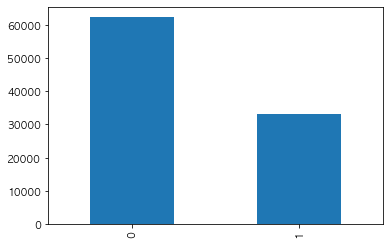

In [281]:
df['Auto_fail_cnt'].value_counts().plot.bar()

<AxesSubplot:>

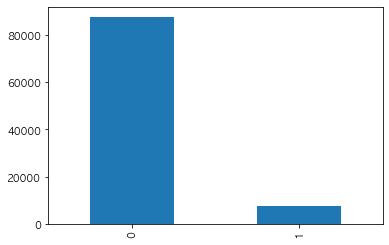

In [282]:
df['Target'].value_counts().plot.bar()

<BarContainer object of 95283 artists>

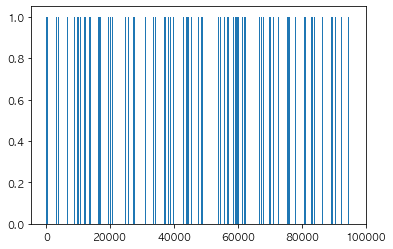

In [280]:
plt.bar(df['Auto_fail_cnt'].index, df['Auto_fail_cnt'])

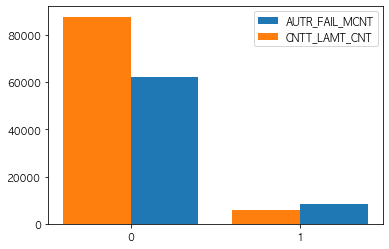

In [286]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

team = ['0','1']
MCNT = [df["AUTR_FAIL_MCNT"].value_counts()[0],df["AUTR_FAIL_MCNT"].value_counts()[1]]
CNT = [df["CNTT_LAMT_CNT"].value_counts()[0],df["CNTT_LAMT_CNT"].value_counts()[1]]

x_axis = np.arange(len(team))

# Multi bar Chart

plt.bar(x_axis +0.2, MCNT, width=0.4, label = 'AUTR_FAIL_MCNT')
plt.bar(x_axis -0.2, CNT, width=0.4, label = 'CNTT_LAMT_CNT')

# Xticks

plt.xticks(x_axis, team)

# Add legend

plt.legend()

# Display

plt.show()


In [292]:
df = pd.read_csv('./Total_0823.csv', index_col = 0)
df

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,0,1,97,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,37,109,5,121,0,0,0,0,1,4
95276,102249,운전직,4600,9800,5,2,19.0,5200,0,0,...,85,0,6,121,0,0,0,0,0,1
95277,102250,자영업,4800,10400,4,2,14.0,5600,0,0,...,1,0,2,121,0,0,0,0,1,1
95278,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,1,1,3,121,0,0,0,0,0,4


In [296]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID              0
OCCP_NAME_G          0
LT1Y_CTLT_CNT        0
AUTR_FAIL_MCNT       0
FYCM_PAID_AMT        0
FMLY_CLAM_CNT        0
FMLY_PLPY_CNT        0
AGE                  0
SEX                  0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
CB_GUIF_AMT          0
Target               0
Target_year          0
Auto_fail_cnt        0
CNTT_LAMT_CNT        0
FMLY_TOT_PREM        0
TOT_PREM             0
LT1Y_CLOD_RATE       0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
STRT_CRDT_GRAD       0
MAX_MON_PRE

In [294]:
df.drop('MATE_JOB_INCM', inplace=True, axis=1)
df

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,0,1,97,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,37,109,5,121,0,0,0,0,1,4
95276,102249,운전직,4600,9800,5,2,19.0,0,0,0,...,85,0,6,121,0,0,0,0,0,1
95277,102250,자영업,4800,10400,4,2,14.0,0,0,0,...,1,0,2,121,0,0,0,0,1,1
95278,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,1,1,3,121,0,0,0,0,0,4


In [297]:
df['HSHD_INFR_INCM'].value_counts()

0        3256
9900     1610
4700     1543
10000    1519
4800     1512
         ... 
2600      158
19900     135
2500      111
20000      38
1600       24
Name: HSHD_INFR_INCM, Length: 103, dtype: int64

In [298]:
df['CUST_JOB_INCM'].value_counts()

3600     32916
4000      3575
5000      3342
4900      3089
4400      3053
4600      2461
4700      2440
4500      2337
4100      2245
4200      2230
4300      2113
3900      2095
3800      2091
3700      1963
4800      1962
5100      1820
5200      1719
5300      1686
3500      1596
5400      1594
3400      1488
5500      1381
3300      1329
5600      1235
3200      1176
5700      1027
5800       932
3100       923
5900       783
3000       772
6000       727
6100       564
6200       529
7000       513
2900       480
6800       455
8400       420
6300       402
6400       395
2800       378
10000      377
7500       338
7900       319
9900       315
7200       300
6500       283
2700       262
6600       262
8900       201
2600       187
2500       107
2400        93
Name: CUST_JOB_INCM, dtype: int64

In [11]:
rp_idx = df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==1)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']]['HSHD_INFR_INCM'].index
rp_idx

Int64Index([  175,   197,   255,   406,   436,   492,   543,   587,   725,
              727,
            ...
            94405, 94435, 94665, 94727, 94930, 95046, 95058, 95142, 95207,
            95241],
           dtype='int64', length=1562)

In [16]:
df['HSHD_INFR_INCM'][175]

0

In [18]:
for i in rp_idx :
    df['HSHD_INFR_INCM'][i] = df['CUST_JOB_INCM'][i]

In [19]:
df[df['HSHD_INFR_INCM']==0]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
20,20,21,학생,3600,0,3,1,0.0,0,0,...,37,37,3,121,0,0,0,0,0,4
236,236,253,주부,3600,0,2,1,0.0,0,0,...,0,0,2,61,0,0,0,0,1,1
273,273,294,3차산업 종사자,4000,0,2,1,39.0,0,0,...,85,0,1,109,0,0,0,0,0,1
352,352,377,주부,3600,0,2,1,44.0,0,0,...,85,0,3,121,1,48001,0,0,1,1
400,400,432,학생,3600,0,2,1,0.0,0,0,...,25,0,3,121,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94953,94953,101908,주부,3600,0,4,3,39.0,0,0,...,121,0,1,1,0,0,0,0,0,1
95006,95006,101965,주부,3600,0,2,1,24.0,0,0,...,1,1,6,121,0,0,0,0,1,4
95148,95148,102112,주부,3600,0,3,1,0.0,0,0,...,37,37,1,121,1,102001,0,0,1,4
95183,95183,102147,학생,3600,0,2,1,0.0,0,0,...,49,121,0,0,1,1,0,0,1,4


# 가구추정소득 이상치0 대체

In [26]:
df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']>1)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['OCCP_NAME_G']=="학생"]['AGE'].value_counts()

35    111
30     82
25     43
40     35
45     26
50     21
60     13
20     11
55      9
65      6
Name: AGE, dtype: int64

In [27]:
df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']>1)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['OCCP_NAME_G']=="학생"]

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,OCCP_NAME_G,AGE
20,3600,0,3,학생,35
400,3600,0,2,학생,60
424,3600,0,2,학생,35
830,3600,0,3,학생,45
1072,3600,0,3,학생,25
...,...,...,...,...,...
93495,3600,0,3,학생,40
94074,3600,0,2,학생,25
94407,3600,0,3,학생,30
95183,3600,0,2,학생,40


In [67]:
fam3 = df[(df['HSHD_INFR_INCM']!=0) & (df['ACTL_FMLY_NUM']>1)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['ACTL_FMLY_NUM']==5]

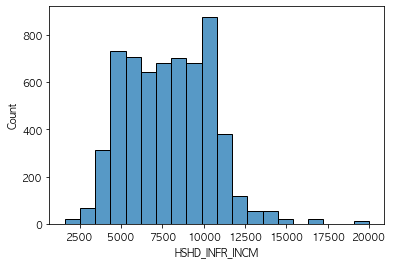

In [68]:
sns.histplot(data=fam3, x = 'HSHD_INFR_INCM', bins= 20);

In [69]:
fam3['HSHD_INFR_INCM'].describe()

count     6076.000000
mean      7880.019750
std       2552.206321
min       1600.000000
25%       5700.000000
50%       7900.000000
75%       9900.000000
max      20000.000000
Name: HSHD_INFR_INCM, dtype: float64

In [70]:
# 가족이 3명인 가구의 중간값으로 대체
df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==5)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']]['CUST_JOB_INCM'].value_counts()

3600    38
4000    12
5000     6
7000     1
4200     1
Name: CUST_JOB_INCM, dtype: int64

가족 2명 => 중간값 : 6800 , 14명   //  평균 : 7183  , 넘는애들 : 8명     
가족 3명 => 중간값 : 6600   , 3명   //  평균 : 7037  , 넘는애들 :2 명    
가족 4명 => 중간값 :  8200  , 3명   //  평균 : 8040   , 넘는애들 : 3 명       
가족 5명 => 중간값 :  7900  , 0 명   //  평균 : 7880  , 넘는애들 : 0 명    
가족 6명: 중간값 : 8100.000000   ,1 명   //  평균 :  7922.815210 , 넘는애들 :1 명      
가족 7명 => 해당 값 없음  
가족 8명 => 해당 값 없음  

가족명수의 가족소득을 기준으로 중간값 대체, 넘는애들은 자기가 번값으로 대체  

In [77]:
idx2 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==2)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<6800].index 
idx2
idx3 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==3)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<6600].index 
idx3
idx4 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==4)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<8200].index 
idx4
idx5 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==5)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<7900].index 
idx5
idx6 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==6)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<8100].index 
idx6
idx7 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==7)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<7800].index 
idx7
idx8 =df[(df['HSHD_INFR_INCM']==0) & (df['ACTL_FMLY_NUM']==8)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']][df['CUST_JOB_INCM']<8800].index 
idx8

Int64Index([], dtype='int64')

In [75]:
len(idx)

773

In [78]:
# 가족이 2일 때 
for i in idx2 :
    df['HSHD_INFR_INCM'][i] = 6800

In [79]:
for i in idx3 :
    df['HSHD_INFR_INCM'][i] = 6600

In [80]:
for i in idx4:
    df['HSHD_INFR_INCM'][i] = 8200

In [81]:
for i in idx5 :
    df['HSHD_INFR_INCM'][i] = 7900

In [82]:
for i in idx6 :
    df['HSHD_INFR_INCM'][i] = 8100

In [83]:
for i in idx7 :
    df['HSHD_INFR_INCM'][i] = 7800

In [84]:
for i in idx8 :
    df['HSHD_INFR_INCM'][i] = 8800

In [88]:
idx = df[(df['HSHD_INFR_INCM']==0)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']].index
len(idx)

21

In [89]:
for i in idx :
    df['HSHD_INFR_INCM'][i] = df['CUST_JOB_INCM'][i]

In [90]:
df[(df['HSHD_INFR_INCM']==0)][['CUST_JOB_INCM','HSHD_INFR_INCM','ACTL_FMLY_NUM','OCCP_NAME_G','AGE']]

,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,OCCP_NAME_G,AGE


# 보험가입가족원수
: 보험가입가족원수 > 가족수  이상치다

In [91]:
df[df['CUST_FMLY_NUM']> df['ACTL_FMLY_NUM']]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# 신용대출건수
: 신용대출건수=0 인데, 신용대출비용 >0

In [95]:
df[(df['CRDT_LOAN_CNT']==0) & (df['TOT_CRLN_AMT']>0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# 신용대출 최초 날짜
: 신용대출건수=0인데, 신용최초날짜가 존재하면 이상치

In [96]:
df[df['CRDT_LOAN_CNT']==0][df['MIN_CNTT_DATE']!=0]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# **생명신용대출금액
: **생명신용대출금액 = 0일때, 건수가 0이 아니면 이상치

In [97]:
df[(df['CRDT_LOAN_CNT']!=0) & (df['TOT_CRLN_AMT']==0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
2282,2282,2453,사무직,5700,6300,1,1,0.0,0,1,...,0,1,2,121,0,0,0,0,0,4
2609,2609,2800,공무원,5100,8700,3,2,0.0,3700,1,...,0,0,3,121,0,0,0,0,0,1
9308,9308,9973,공무원,5100,8500,2,1,0.0,0,1,...,37,0,4,121,0,0,0,0,0,1
10755,10755,11544,사무직,5800,10400,4,2,19.0,4700,1,...,37,37,4,121,0,0,0,0,0,4
11103,11103,11924,학생,3600,9200,3,2,0.0,0,1,...,1,1,3,121,0,0,0,0,0,4
16166,16166,17369,사무직,6100,9700,4,1,0.0,3700,1,...,121,0,4,121,0,0,0,0,0,1
24365,24365,26167,2차산업 종사자,4000,4300,3,1,0.0,0,1,...,0,37,3,49,0,0,1,0,1,4
24737,24737,26564,공무원,4700,9300,5,1,14.0,4600,1,...,1,1,6,121,0,0,0,0,0,4
25112,25112,26966,전문직,7900,11200,5,1,34.0,3600,1,...,1,1,3,85,0,0,0,0,0,4
27931,27931,29990,공무원,5500,10000,5,2,14.0,0,1,...,49,49,4,121,0,0,0,0,0,2


In [100]:
print(df[df['CRDT_LOAN_CNT']==0].shape[0])
print(df[df['TOT_CRLN_AMT']==0].shape[0])

85938
85973


In [102]:
idx = df[(df['CRDT_LOAN_CNT']!=0) & (df['TOT_CRLN_AMT']==0)].index
idx

Int64Index([ 2282,  2609,  9308, 10755, 11103, 16166, 24365, 24737, 25112,
            27931, 30267, 36020, 40093, 45443, 45645, 46724, 55630, 60989,
            61255, 64111, 65828, 71524, 73560, 73593, 75161, 80822, 85681,
            87131, 88194, 88202, 89811, 92212, 94725, 94841, 95141],
           dtype='int64')

In [103]:
for i in idx :
    df['CRDT_LOAN_CNT'][i] = 0

In [104]:
df[(df['CRDT_LOAN_CNT']!=0) & (df['TOT_CRLN_AMT']==0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# **생명상환금액

: 대출금액 < 상환금액 이상치 !

In [105]:
df[df['TOT_CRLN_AMT'] < df['TOT_REPY_AMT']]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


: 대출건수 = 0 인데, 상환금액이 0이 아닌 경우

In [106]:
df[(df['CRDT_LOAN_CNT']==0)&(df['TOT_REPY_AMT'] !=0)] 

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# 신용대출 연체율

: 신용대출 건수 =0인데, 연체율이 0이 아닌 경우   
: 신용대출 연체율이 0 인데, 30일 이내 연체율이 0이 아닌 경우  
: 신용대출 연체율이 0 인데, 1년 이내 연체율이 0이 아닌 경우  

In [108]:
df[(df['CRDT_LOAN_CNT']==0)&(df['CRLN_OVDU_RATE']!=0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


In [111]:
df[(df['CRLN_30OVDU_RATE']!=0)&(df['CRLN_OVDU_RATE']==0)][['CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE']]

,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE
4388,0,36,0
29443,0,6,0
51200,0,51,0


In [112]:
idx = df[(df['CRLN_30OVDU_RATE']!=0)&(df['CRLN_OVDU_RATE']==0)].index
idx

Int64Index([4388, 29443, 51200], dtype='int64')

In [113]:
for i in idx :
    df['CRLN_30OVDU_RATE'] = 0

In [114]:
df[(df['CRLN_30OVDU_RATE']!=0)&(df['CRLN_OVDU_RATE']==0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


In [115]:
df[(df['LT1Y_CLOD_RATE']!=0)&(df['CRLN_OVDU_RATE']==0)][['CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE']]

,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE


# 30일이내 신용대출연체율

: 신용대출 건수 =0인데, 30일이내 신용대출연체율이 0이 아닌 경우   

In [118]:
df[(df['CRDT_LOAN_CNT']==0)&(df['CRLN_30OVDU_RATE']!=0)][['CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE']]

,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE


# 최근1년 신용대출연체율

: 신용대출 건수 =0인데, 최근1년 연체율이 0이 아닌 경우   
: 최근1년 신용대출연체율이 0인데 , 30일 이내 연체율이 0이 아닌 경우   

In [120]:
df[(df['CRDT_LOAN_CNT']==0)&(df['LT1Y_CLOD_RATE']!=0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


In [121]:
df[(df['CRLN_30OVDU_RATE']!=0)&(df['LT1Y_CLOD_RATE']==0)]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category


# 최초신용등급

In [122]:
df['STRT_CRDT_GRAD'].value_counts()

0    91599
4      869
5      865
3      702
2      532
6      480
1      193
7       40
Name: STRT_CRDT_GRAD, dtype: int64

In [124]:
df[df['STRT_CRDT_GRAD'] ==0][df['LTST_CRDT_GRAD']!=0][['STRT_CRDT_GRAD', 'LTST_CRDT_GRAD']]

,STRT_CRDT_GRAD,LTST_CRDT_GRAD
83,0,9
156,0,8
186,0,4
347,0,4
494,0,4
...,...,...
94932,0,5
95029,0,5
95062,0,6
95245,0,10


In [126]:
df[df['STRT_CRDT_GRAD'] ==0][df['LTST_CRDT_GRAD']!=0]['LTST_CRDT_GRAD'].value_counts()

6     360
5     226
7     218
8     146
4     137
10     85
9      66
2      44
3      41
1      19
Name: LTST_CRDT_GRAD, dtype: int64

In [127]:
df[df['STRT_CRDT_GRAD'] ==0][df['LTST_CRDT_GRAD']==0]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,0,1,공무원,5400,7700,4,1,24.0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,1,2,자영업,5500,8100,4,2,29.0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,2,3,주부,3600,4900,4,1,34.0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,3,4,학생,3600,10100,2,1,0.0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,4,5,공무원,4800,4800,4,1,14.0,0,0,...,1,0,1,97,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,95275,102248,자영업,5500,12900,3,3,34.0,0,0,...,37,109,5,121,0,0,0,0,1,4
95276,95276,102249,운전직,4600,9800,5,2,19.0,5200,0,...,85,0,6,121,0,0,0,0,0,1
95277,95277,102250,자영업,4800,10400,4,2,14.0,5600,0,...,1,0,2,121,0,0,0,0,1,1
95278,95278,102251,사무직,4200,4200,1,1,0.0,0,0,...,1,1,3,121,0,0,0,0,0,4


In [128]:
df[df['CRDT_LOAN_CNT']!=0]

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
6,6,7,주부,3600,7700,5,3,19.0,4400,1,...,121,121,2,121,1,6001,0,0,1,4
30,30,33,2차산업 종사자,4800,7600,5,3,39.0,0,3,...,85,85,4,121,0,0,0,0,1,4
40,40,44,2차산업 종사자,5600,9200,1,1,0.0,0,11,...,121,0,6,121,0,0,1,1,1,1
43,43,47,자영업,3800,3800,2,1,24.0,0,1,...,121,121,1,121,0,0,1,1,1,4
60,60,65,사무직,3400,3400,3,2,0.0,0,1,...,1,0,2,73,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95231,95231,102201,자영업,7200,7100,3,1,14.0,0,1,...,61,0,3,13,0,0,0,0,0,1
95245,95245,102216,사무직,6100,8200,4,1,34.0,0,1,...,121,121,1,121,0,0,0,0,0,4
95261,95261,102233,자영업,5000,10400,3,1,0.0,4200,2,...,0,0,2,121,0,0,1,0,1,4
95263,95263,102235,학생,3600,7400,1,1,0.0,0,1,...,1,1,1,13,0,0,0,0,0,4


# 일단 여기까지 오케이

3681


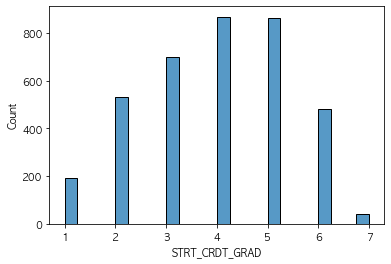

In [131]:
test = df[df['STRT_CRDT_GRAD']!=0]
print(test.shape[0])
sns.histplot(data = test, x = 'STRT_CRDT_GRAD');

In [138]:
test['STRT_CRDT_GRAD'].value_counts()

4    869
5    865
3    702
2    532
6    480
1    193
7     40
Name: STRT_CRDT_GRAD, dtype: int64

5021


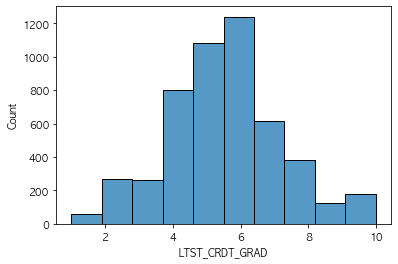

In [137]:
test1 = df[df['LTST_CRDT_GRAD']!=0]
print(test1.shape[0])
sns.histplot(data = test1, x = 'LTST_CRDT_GRAD', bins =10);

In [136]:
test1['LTST_CRDT_GRAD'].value_counts()

6     1239
5     1079
4      802
7      618
8      383
2      268
3      265
10     180
9      126
1       61
Name: LTST_CRDT_GRAD, dtype: int64

In [141]:
df[df['Category']==1][['STRT_CRDT_GRAD']].value_counts()

STRT_CRDT_GRAD
0                 38123
5                   347
4                   329
3                   281
2                   231
6                   178
1                    74
7                    13
dtype: int64

In [144]:
df[df['Category']==1][df['STRT_CRDT_GRAD']==7][['LTST_CRDT_GRAD']]

,LTST_CRDT_GRAD
14998,10
18875,7
20362,8
35415,9
39195,8
46664,7
49888,8
64366,7
67494,9
79151,7


# 신용대출이 가능/불가능 여부로 파라미터 판단 

은행에서 7등급까지 빌릴 수 있어서 등급으로 나눠서 살펴보는 것은 무의미  
1) 현재 신용등급을 가지고 가능(1)/불가능(0)으로 분류
2) 이상치를 채우는 조건을 신용대출(1,2금융권)이 가능한지 불가능한지로 1차 판단  

In [145]:
df['Pos_loan'] = 0

In [146]:
df

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,0,1,공무원,5400,7700,4,1,24.0,0,0,...,0,2,13,3,420001,0,0,1,1,0
1,1,2,자영업,5500,8100,4,2,29.0,0,0,...,0,2,121,0,0,0,0,0,1,0
2,2,3,주부,3600,4900,4,1,34.0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,3,4,학생,3600,10100,2,1,0.0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,4,5,공무원,4800,4800,4,1,14.0,0,0,...,0,1,97,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,95275,102248,자영업,5500,12900,3,3,34.0,0,0,...,109,5,121,0,0,0,0,1,4,0
95276,95276,102249,운전직,4600,9800,5,2,19.0,5200,0,...,0,6,121,0,0,0,0,0,1,0
95277,95277,102250,자영업,4800,10400,4,2,14.0,5600,0,...,0,2,121,0,0,0,0,1,1,0
95278,95278,102251,사무직,4200,4200,1,1,0.0,0,0,...,1,3,121,0,0,0,0,0,4,0


In [148]:
df['LTST_CRDT_GRAD'].value_counts()

0     90259
6      1239
5      1079
4       802
7       618
8       383
2       268
3       265
10      180
9       126
1        61
Name: LTST_CRDT_GRAD, dtype: int64

In [150]:
# LTST_CRDT_GRAD
idx = df[(df['LTST_CRDT_GRAD'] !=0)&(df['LTST_CRDT_GRAD'] <=7)].index
len(idx)

4332

In [151]:
for i in idx :
    df['Pos_loan'][i] = 1

In [153]:
df[df['Pos_loan']==1][['Pos_loan', 'LTST_CRDT_GRAD']]

,Pos_loan,LTST_CRDT_GRAD
30,1,4
40,1,5
60,1,6
71,1,7
73,1,4
...,...,...
95069,1,2
95090,1,3
95231,1,6
95261,1,4


In [158]:
df[(df['BNK_LNIF_AMT']>0) | (df['SPART_LNIF_CNT']>0)][df['ECT_LNIF_CNT']==0][['LTST_CRDT_GRAD']].value_counts()

LTST_CRDT_GRAD
0                 54554
6                   680
5                   593
4                   465
7                   350
8                   210
3                   163
2                   162
10                   91
9                    56
1                    35
dtype: int64

In [161]:
df[(df['BNK_LNIF_AMT']>0) | (df['SPART_LNIF_CNT']>0)][df['ECT_LNIF_CNT']==0][df['LTST_CRDT_GRAD']<=7][['LTST_CRDT_GRAD']].value_counts()

LTST_CRDT_GRAD
0                 54554
6                   680
5                   593
4                   465
7                   350
3                   163
2                   162
1                    35
dtype: int64

In [164]:
idx = df[(df['BNK_LNIF_AMT']>0) | (df['SPART_LNIF_CNT']>0)][df['ECT_LNIF_CNT']==0][df['LTST_CRDT_GRAD']<=7][['LTST_CRDT_GRAD']].index
idx

Int64Index([    0,     1,     4,     7,     8,     9,    12,    13,    14,
               17,
            ...
            95262, 95265, 95267, 95270, 95271, 95273, 95274, 95276, 95277,
            95279],
           dtype='int64', length=57002)

In [165]:
for i in idx :
    df['Pos_loan'][i] = 1

In [166]:
df[df['Pos_loan']==0].shape[0]

36394

In [167]:
df[df['Pos_loan']==1].shape[0]

58886

In [171]:
df.reset_index(inplace=True, drop=True)

# 데이터 추출  
  
지금 현재 만든 파일  
  
1)  Total_0823.csv     분류모델에서 돌린 파일(보험 이상치 제거 안한 파일)      
2)  in_Total_0823.csv  모든 이상치 제거 파일(include - 신용등급)  
3)  ex_Total_0823.csv  모든 이상치 제거 파일(exclude - 신용등급)  

In [177]:
df.to_csv("in_Total_0823.csv", index= False)

In [190]:
aaa=pd.read_csv('~/Desktop/Total_0823.csv')
aaa.head()

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,0,1,공무원,5400,7700,4,1,24.0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,1,2,자영업,5500,8100,4,2,29.0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,2,3,주부,3600,4900,4,1,34.0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,3,4,학생,3600,10100,2,1,0.0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,4,5,공무원,4800,4800,4,1,14.0,0,0,...,1,0,1,97,0,0,0,0,0,1


In [191]:
aaa.drop(['Unnamed: 0'], axis=1, inplace=True)
aaa

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,0,1,97,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,37,109,5,121,0,0,0,0,1,4
95276,102249,운전직,4600,9800,5,2,19.0,5200,0,0,...,85,0,6,121,0,0,0,0,0,1
95277,102250,자영업,4800,10400,4,2,14.0,5600,0,0,...,1,0,2,121,0,0,0,0,1,1
95278,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,1,1,3,121,0,0,0,0,0,4


In [193]:
aaa.to_csv("Total_0823.csv", index= False)

In [194]:
aaa.head(10)

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,1,0,2,13,3,420001,0,0,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,0,2,121,0,0,0,0,0,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,1,25,4,121,0,0,0,0,0,4
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,1,25,4,61,0,0,0,0,0,4
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,0,1,97,0,0,0,0,0,1
5,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,1,1,4,121,0,0,0,0,0,4
6,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,121,2,121,1,6001,0,0,1,4
7,8,기업/단체 임원,8400,10300,3,1,24.0,5000,0,0,...,1,0,2,121,0,0,0,0,0,1
8,9,주부,3600,7600,4,1,9.0,5400,0,0,...,37,0,5,121,0,0,0,0,0,1
9,10,단순 사무직,4700,12400,4,1,14.0,7500,0,0,...,1,1,3,25,0,0,0,0,1,2


In [178]:
amamamam = pd.read_csv('~/Desktop/in_Total_0823.csv')
amamamam.head()

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,0,1,공무원,5400,7700,4,1,24.0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,1,2,자영업,5500,8100,4,2,29.0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,2,3,주부,3600,4900,4,1,34.0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,3,4,학생,3600,10100,2,1,0.0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,4,5,공무원,4800,4800,4,1,14.0,0,0,...,0,1,97,0,0,0,0,0,1,1


In [179]:
amamamam.columns

Index(['Unnamed: 0', 'CUST_ID', 'OCCP_NAME_G', 'CUST_JOB_INCM',
       'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'LAST_CHLD_AGE',
       'MATE_JOB_INCM', 'CRDT_LOAN_CNT', 'MIN_CNTT_DATE', 'TOT_CRLN_AMT',
       'TOT_REPY_AMT', 'CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',
       'STRT_CRDT_GRAD', 'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE',
       'AVG_STLN_RATE', 'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE',
       'GDINS_MON_PREM', 'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM',
       'FMLY_SVINS_MNPREM', 'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',
       'CNTT_LAMT_CNT', 'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT',
       'FMLY_CLAM_CNT', 'FMLY_PLPY_CNT', 'AGE', 'SEX', 'TARGET',
       'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT',
       'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT', 'CPT_LNIF_AMT',
       'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT', 'CTCD_OCCR_MDIF',
       'CB_GUIF_CNT', 'CB_GUIF_AMT', 'Target', 'Tar

In [180]:
amamamam.drop(['Unnamed: 0'], axis=1, inplace=True)
amamamam

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,1,97,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95275,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,109,5,121,0,0,0,0,1,4,0
95276,102249,운전직,4600,9800,5,2,19.0,5200,0,0,...,0,6,121,0,0,0,0,0,1,1
95277,102250,자영업,4800,10400,4,2,14.0,5600,0,0,...,0,2,121,0,0,0,0,1,1,1
95278,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,1,3,121,0,0,0,0,0,4,0


In [181]:
amamamam.to_csv("in_Total_0823.csv", index= False)

In [182]:
kkkk = pd.read_csv('~/Desktop/in_Total_0823.csv')
kkkk.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,1,97,0,0,0,0,0,1,1


In [183]:
df.drop(['STRT_CRDT_GRAD', 'LTST_CRDT_GRAD'], axis= 1,inplace=True)
df.head()

,Unnamed: 0,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,0,1,공무원,5400,7700,4,1,24.0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,1,2,자영업,5500,8100,4,2,29.0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,2,3,주부,3600,4900,4,1,34.0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,3,4,학생,3600,10100,2,1,0.0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,4,5,공무원,4800,4800,4,1,14.0,0,0,...,0,1,97,0,0,0,0,0,1,1


In [184]:
df.drop(['Unnamed: 0'], axis= 1,inplace=True)
df.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,1,97,0,0,0,0,0,1,1


In [185]:
df.to_csv("ex_Total_0823.csv", index= False)

In [186]:
amamamam = pd.read_csv('~/Desktop/ex_Total_0823.csv')

In [187]:
amamamam.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,1,97,0,0,0,0,0,1,1


# 3장 데이터 분석

In [4]:
df = pd.read_csv("~/Desktop/in_Total_0823.csv")
df.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,0,2,13,3,420001,0,0,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,0,2,121,0,0,0,0,0,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,25,4,121,0,0,0,0,0,4,0
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,25,4,61,0,0,0,0,0,4,0
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,1,97,0,0,0,0,0,1,1


## 보험료연체율 

: 보험료연체율이 0 인데, 1년 보험료연체율이 0이 아닌면 이상치        ok  
: 보험료연체율이 0 인데, 자동이체 실패월수 0이 아닌 경우            세모 [다시보기]  
    
[파생변수]   
: 보험 연체를 한 사람(1)  / 보험연체를 안 해본 사람 (0)    
: df['PREM_OVDU_RATE'] == 0 이면, 보험연체를 안 해본 사람(0)  
: 나중에 연령별 연체여부 파악해볼 수 있음  

In [3]:
df['PREM_OVDU_RATE'].describe()

count    95280.000000
mean         7.515428
std         10.988367
min          0.000000
25%          0.000000
50%          3.000000
75%         10.000000
max         99.000000
Name: PREM_OVDU_RATE, dtype: float64

In [11]:
# 보험료 연체 여부 (연체한 사람 1, 연체 안한 사람 0)
df['Yn_ovdu'] = 1

In [14]:
df[df['PREM_OVDU_RATE'] == 0]['PREM_OVDU_RATE'].count()

26118

In [12]:
# 연체를 안 해본 사람 26118
idx =df[df['PREM_OVDU_RATE'] == 0].index
idx

Int64Index([    4,    11,    13,    16,    17,    19,    20,    21,    26,
               27,
            ...
            95253, 95260, 95262, 95268, 95270, 95271, 95273, 95274, 95278,
            95279],
           dtype='int64', length=26118)

In [15]:
for i in idx :
    df['Yn_ovdu'][i] = 0
df.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,2,13,3,420001,0,0,1,1,1,1
1,2,자영업,5500,8100,4,2,29.0,0,0,0,...,2,121,0,0,0,0,0,1,1,1
2,3,주부,3600,4900,4,1,34.0,0,0,0,...,4,121,0,0,0,0,0,4,0,1
3,4,학생,3600,10100,2,1,0.0,0,0,0,...,4,61,0,0,0,0,0,4,0,1
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,97,0,0,0,0,0,1,1,0


In [10]:
df[df['PREM_OVDU_RATE']==0][df['AUTR_FAIL_MCNT']!=0][['PREM_OVDU_RATE', 'AUTR_FAIL_MCNT']]['AUTR_FAIL_MCNT'].value_counts()

1     656
2     180
3      49
4      34
5      30
6      17
7      12
8       8
11      7
9       7
12      6
10      5
13      3
16      2
15      2
19      1
18      1
22      1
Name: AUTR_FAIL_MCNT, dtype: int64

In [17]:
df[df['PREM_OVDU_RATE']==0][df['AUTR_FAIL_MCNT']!=0][['PREM_OVDU_RATE', 'AUTR_FAIL_MCNT']]

,PREM_OVDU_RATE,AUTR_FAIL_MCNT
53,0,6
54,0,2
119,0,4
267,0,2
363,0,1
...,...,...
94884,0,5
94918,0,1
95059,0,2
95128,0,2


# 최근 1년 보험료 연체율

: 패스

In [18]:
df['LT1Y_CTLT_CNT'].describe()

count    95280.000000
mean         0.020697
std          0.192296
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: LT1Y_CTLT_CNT, dtype: float64

# 평균약대율 
: 평균약대율로 알 수 있는 사항 => 약관대출을 받은 사람 1  / 약관대출을 안받은 사람 0  
: 약관대출을 받았다는 것은 '목돈필요' 또는 '경제적인 어려움' 으로 돈이 필요해서  
: 약관대출 여부와 보험해지건수를 살펴보면 

In [25]:
# 약관대출 여부 (약관대출 한 사람 1, 약관대출 안 한 사람 0)
df['Yn_stln'] = 1
# 약관대출 안 한 사람 74402명
idx =df[df['AVG_STLN_RATE'] == 0].index
for i in idx :
    df['Yn_stln'][i] = 0

In [20]:
df['AVG_STLN_RATE'].describe()

count    95280.000000
mean        16.737521
std         34.117337
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: AVG_STLN_RATE, dtype: float64

In [24]:
df[df['AVG_STLN_RATE']>0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,1,97,0,0,0,0,0,1,1,0
6,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,2,121,1,6001,0,0,1,4,0,1
9,10,단순 사무직,4700,12400,4,1,14.0,7500,0,0,...,3,25,0,0,0,0,1,2,1,1
12,13,학생,3600,5900,3,2,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
15,16,주부,3600,4900,5,1,19.0,4400,0,0,...,0,0,0,0,0,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95261,102233,자영업,5000,10400,3,1,0.0,4200,2,201103,...,2,121,0,0,1,0,1,4,1,1
95263,102235,학생,3600,7400,1,1,0.0,0,1,200305,...,1,13,0,0,0,0,0,4,0,1
95265,102237,자영업,5600,5600,3,3,0.0,0,0,0,...,4,109,0,0,0,0,1,1,1,1
95266,102238,주부,3600,5200,2,2,34.0,0,2,200201,...,1,61,0,0,0,0,0,4,1,1


# 약관대출가능잔액

In [26]:
df['STLN_REMN_AMT'].describe()

count    9.528000e+04
mean     1.572219e+06
std      5.697368e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.010000e+08
Name: STLN_REMN_AMT, dtype: float64

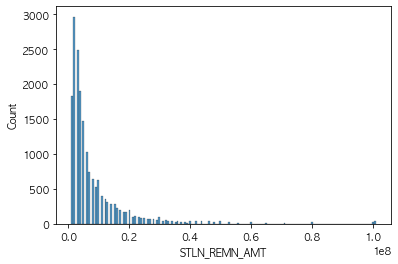

In [28]:
test = df[df['STLN_REMN_AMT']>0]
sns.histplot(data = test, x = 'STLN_REMN_AMT');

In [33]:
df[(df['STLN_REMN_AMT']>0)&(df['STLN_REMN_AMT']>1000000)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
4,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
6,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
12,13,학생,3600,5900,3,2,0.0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
25,28,자영업,5900,9100,4,1,24.0,0,0,0,...,73,0,0,0,0,1,1,1,1,1
30,33,2차산업 종사자,4800,7600,5,3,39.0,0,3,201306,...,121,0,0,0,0,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95257,102228,사무직,5000,9800,4,1,29.0,4800,0,0,...,121,0,0,1,0,1,1,1,1,1
95261,102233,자영업,5000,10400,3,1,0.0,4200,2,201103,...,121,0,0,1,0,1,4,1,1,1
95263,102235,학생,3600,7400,1,1,0.0,0,1,200305,...,13,0,0,0,0,0,4,0,1,1
95265,102237,자영업,5600,5600,3,3,0.0,0,0,0,...,109,0,0,0,0,1,1,1,1,1


# 최근 1년 약대금액   
: 최근 1년 평균 월별 약대금액 = 최근 1년 약대금액  /12  
: 평균약대율 = 최근 1년 평균 월별 약대금액/(월별 약관대출 가능금액)  
:    
: 1년에 사람들은 보통 약대를 얼마나 받을까?  

In [35]:
df['LT1Y_STLN_AMT'].describe()

count    9.528000e+04
mean     9.264798e+05
std      5.751626e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.010000e+08
Name: LT1Y_STLN_AMT, dtype: float64

<AxesSubplot:xlabel='LT1Y_STLN_AMT', ylabel='Count'>

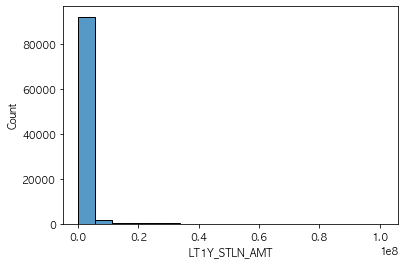

In [36]:
sns.histplot(x= 'LT1Y_STLN_AMT', data = df)

# (개인) 비연금저축상품 월납입 보험료 - 보장성

In [48]:
df[df['GDINS_MON_PREM']> df['MAX_MON_PREM']][['SVINS_MON_PREM','GDINS_MON_PREM', 'MAX_MON_PREM']]

,SVINS_MON_PREM,GDINS_MON_PREM,MAX_MON_PREM


In [49]:
df['GDINS_MON_PREM'].describe()

count    9.528000e+04
mean     1.276336e+05
std      2.351458e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+04
75%      1.600000e+05
max      4.000000e+06
Name: GDINS_MON_PREM, dtype: float64

<AxesSubplot:xlabel='GDINS_MON_PREM', ylabel='Count'>

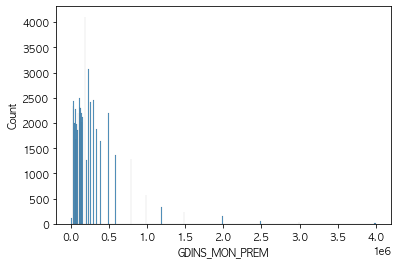

In [50]:
test = df[df.GDINS_MON_PREM >0]
sns.histplot(data= test, x ='GDINS_MON_PREM')

# (개인) 연금저축상품 월납입 보험료 - 저축성
: 비연금 저축상품 월납입 > 최대 월납입 보험료 인 경우 이상치  

In [51]:
idx =df[df['SVINS_MON_PREM']> df['MAX_MON_PREM']].index
for i in idx :
    df['MAX_MON_PREM'][i] = df['SVINS_MON_PREM'][i]

In [52]:
idx

Int64Index([36659, 49815], dtype='int64')

# 가구비연금저축상품월납입 보험료
: 최대 월 납입 보험료보다 보장성 상품의 월납환산보험료가 더 큰 경우 이상치  

In [41]:
df[df['FMLY_GDINS_MNPREM']> df['MAX_MON_PREM']][['FMLY_SVINS_MNPREM','FMLY_GDINS_MNPREM', 'MAX_MON_PREM']]

,FMLY_SVINS_MNPREM,FMLY_GDINS_MNPREM,MAX_MON_PREM
1,0,110000,0
6,200000,300000,200000
21,0,490000,70000
27,0,230000,150000
30,0,1190000,230000
...,...,...,...
95229,0,990000,490000
95239,230000,990000,390000
95260,0,90000,0
95266,0,490000,340000


In [46]:
# 56개
df[df['MAX_MON_PREM'] %1000 ==999][['FMLY_SVINS_MNPREM','FMLY_GDINS_MNPREM', 'MAX_MON_PREM']]

,FMLY_SVINS_MNPREM,FMLY_GDINS_MNPREM,MAX_MON_PREM
680,0,9999,9999
1153,0,30000,9999
3182,0,0,9999
5520,0,40000,9999
5943,0,30000,9999
7682,0,9999,9999
8008,0,0,9999
8754,0,9999,9999
11994,0,0,9999
14576,0,9999,9999


# 최대 월납입 보험료
최대 월납입 보험료가 0인 것은 이상치  
=> 납입중인 (보장성, 저축성) 월납입보험료 중 큰 값으로 대체

In [53]:
df[df['GDINS_MON_PREM']!=0][df['MAX_MON_PREM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [75]:
df[df['SVINS_MON_PREM']!=0][df['MAX_MON_PREM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [62]:
idx= df[df['SVINS_MON_PREM']==0][df['MAX_MON_PREM']==0][df['GDINS_MON_PREM']==0].index
idx

Int64Index([    1,     3,    58,    65,    68,    72,    85,   150,   183,
              193,
            ...
            95122, 95142, 95175, 95179, 95182, 95199, 95205, 95209, 95214,
            95260],
           dtype='int64', length=5414)

In [70]:
for i in idx :
    df.drop(i,axis=0,inplace=True)

In [71]:
df[df['SVINS_MON_PREM']==0][df['MAX_MON_PREM']==0][df['GDINS_MON_PREM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [72]:
df.reset_index(inplace=True, drop=True)

In [73]:
df.head(10)

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,121,0,0,0,0,0,4,0,1,0
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,121,0,0,0,0,0,4,0,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
5,8,기업/단체 임원,8400,10300,3,1,24.0,5000,0,0,...,121,0,0,0,0,0,1,1,1,0
6,9,주부,3600,7600,4,1,9.0,5400,0,0,...,121,0,0,0,0,0,1,1,1,0
7,10,단순 사무직,4700,12400,4,1,14.0,7500,0,0,...,25,0,0,0,0,1,2,1,1,1
8,11,주부,3600,11300,3,1,24.0,6200,0,0,...,61,0,0,0,0,1,4,0,1,0
9,12,주부,3600,9200,2,1,0.0,5300,0,0,...,121,0,0,0,0,0,4,0,0,0


In [74]:
df[df['GDINS_MON_PREM']!=0][df['MAX_MON_PREM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [58]:
df[['MAX_MON_PREM', 'SVINS_MON_PREM','GDINS_MON_PREM']].describe()

,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM
count,9.528000e+04,9.528000e+04,9.528000e+04
mean,3.701009e+05,9.143272e+04,1.276336e+05
std,6.939402e+05,3.139747e+05,2.351458e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+04,0.000000e+00,0.000000e+00
50%,1.900000e+05,0.000000e+00,5.000000e+04
75%,3.900000e+05,0.000000e+00,1.600000e+05
max,1.000000e+07,4.000000e+06,4.000000e+06


### 값 교정 다시 해보기

In [138]:
df[df['SVINS_MON_PREM']>0][df['GDINS_MON_PREM']>0][['MAX_MON_PREM', 'SVINS_MON_PREM','GDINS_MON_PREM', 'CUST_ID']]

,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM,CUST_ID
16,590000,110000,390000,19
38,790000,110000,340000,44
65,590000,490000,150000,75
70,790000,110000,300000,81
71,230000,150000,30000,82
...,...,...,...,...
89838,1490000,590000,790000,102222
89847,2990000,230000,160000,102233
89851,1190000,590000,300000,102237
89855,490000,230000,260000,102241


In [141]:
idx = df[df['SVINS_MON_PREM']>0][df['GDINS_MON_PREM']>0][df['MAX_MON_PREM']<(df['SVINS_MON_PREM']+df['GDINS_MON_PREM'])].index
idx

Int64Index([   65,    78,   147,   177,   188,   207,   265,   273,   409,
              410,
            ...
            89388, 89392, 89426, 89434, 89508, 89614, 89625, 89656, 89679,
            89825],
           dtype='int64', length=2234)

In [142]:
for i in idx :
    df['MAX_MON_PREM'][i] = df['SVINS_MON_PREM'][i] + df['GDINS_MON_PREM'][i]

# 값이 안 맞았던거 제거 완료    

In [134]:
df[(df['MAX_MON_PREM']== df['SVINS_MON_PREM']) | (df['MAX_MON_PREM']== df['GDINS_MON_PREM'])]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
6,9,주부,3600,7600,4,1,9.0,5400,0,0,...,121,0,0,0,0,0,1,1,1,0
9,12,주부,3600,9200,2,1,0.0,5300,0,0,...,121,0,0,0,0,0,4,0,0,0
12,15,학생,3600,5500,3,1,0.0,0,0,0,...,37,0,0,0,0,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89859,102245,사무직,5400,5400,1,1,0.0,0,0,0,...,13,0,0,0,0,0,2,1,0,0
89860,102247,자영업,5000,5000,1,1,0.0,0,0,0,...,121,0,0,0,0,0,1,1,0,0
89861,102248,자영업,5500,12900,3,3,34.0,0,0,0,...,121,0,0,0,0,1,4,0,1,0
89864,102251,사무직,4200,4200,1,1,0.0,0,0,0,...,121,0,0,0,0,0,4,0,0,0


In [76]:
# max가 월납입 보험료(보장성, 저축성)보다 작을 경우, 둘 중에 큰 값으로 대체 
for i in range(len(df['MAX_MON_PREM'])) :
    a = df['SVINS_MON_PREM'][i]
    b = df['GDINS_MON_PREM'][i]
    c = df['MAX_MON_PREM'][i]
    if c < a :
        if b < a :
            df['MAX_MON_PREM'][i] = a
        else :
            df['MAX_MON_PREM'][i] = b
    elif c < b :
        if b < a :
            df['MAX_MON_PREM'][i] = a
        else :
            df['MAX_MON_PREM'][i] = b

In [80]:
df[df['MAX_MON_PREM']< df['SVINS_MON_PREM'] ][df['MAX_MON_PREM'] < df['GDINS_MON_PREM']][['FMLY_SVINS_MNPREM','FMLY_GDINS_MNPREM', 'MAX_MON_PREM']]

,FMLY_SVINS_MNPREM,FMLY_GDINS_MNPREM,MAX_MON_PREM


In [79]:
df.shape

(89866, 60)

In [143]:
df[['TOT_PREM', 'MAX_MON_PREM', 'SVINS_MON_PREM', 'GDINS_MON_PREM']].describe()

,TOT_PREM,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM
count,8.986600e+04,8.986600e+04,8.986600e+04,8.986600e+04
mean,2.065500e+07,3.941184e+05,9.694111e+04,1.353229e+05
std,4.177703e+07,7.115382e+05,3.224673e+05,2.399671e+05
min,1.000000e+06,9.999000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,9.000000e+04,0.000000e+00,0.000000e+00
50%,1.100000e+07,1.900000e+05,0.000000e+00,6.000000e+04
75%,2.400000e+07,3.900000e+05,0.000000e+00,1.900000e+05
max,1.000000e+09,1.000000e+07,4.000000e+06,4.000000e+06


<AxesSubplot:xlabel='TOT_PREM', ylabel='Count'>

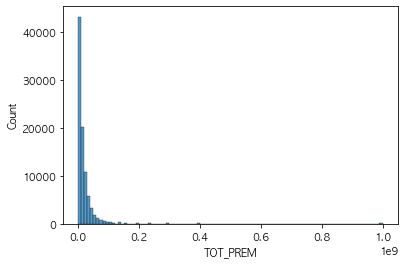

In [144]:
test = df[df['TOT_PREM']>0]
sns.histplot(data= test, x = 'TOT_PREM', bins= 100)

In [145]:
1.1*10000000

11000000.0

In [146]:
df[df['TOT_PREM']==0][df['MAX_MON_PREM']>11000000.0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [147]:
# 전체 기납입보험료 TOT_PREM == 0 일 수 없으므로, TOT_PREM의 중앙값으로 대체 
df[df['TOT_PREM']==0][['MAX_MON_PREM', 'SVINS_MON_PREM', 'GDINS_MON_PREM', 'TOT_PREM']]

,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM,TOT_PREM


In [97]:
idx = df[df['TOT_PREM']==0].index
len(idx)

51

In [98]:
for i in idx :
    df['TOT_PREM'][i] = 11000000

In [99]:
df[df['TOT_PREM']==0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


# (가구) 가구기납입 보험료
: 가구기납입보험료 == 0 이상치  
: 기납입보험료 > 가구기납입보험료 이상치  
: 가구 기납입 보험료랑 < 가구 (저축성, 보장성)월납 보험료  이상치, 바꿔서 채워줘야 함

In [148]:
df[df['FMLY_TOT_PREM']< df['TOT_PREM']]['FMLY_TOT_PREM'].value_counts()

Series([], Name: FMLY_TOT_PREM, dtype: int64)

In [149]:
df[df['FMLY_TOT_PREM']< df['TOT_PREM']][['FMLY_TOT_PREM','TOT_PREM', 'MAX_MON_PREM', 'SVINS_MON_PREM', 'GDINS_MON_PREM']]

,FMLY_TOT_PREM,TOT_PREM,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM


In [150]:
df['FMLY_TOT_PREM'].describe()

count    8.986600e+04
mean     3.073835e+07
std      6.128453e+07
min      1.000000e+06
25%      7.000000e+06
50%      1.600000e+07
75%      3.500000e+07
max      1.000000e+09
Name: FMLY_TOT_PREM, dtype: float64

In [109]:
1.600000e+07

16000000.0

In [151]:
idx = df[df['FMLY_TOT_PREM']< df['TOT_PREM']][df['FMLY_TOT_PREM']==0].index
idx

Int64Index([], dtype='int64')

In [112]:
# 중간값 대체
for i in idx :
    df['FMLY_TOT_PREM'][i] = 16000000

In [153]:
df[df['FMLY_TOT_PREM']< df['TOT_PREM']][['FMLY_TOT_PREM','TOT_PREM', 'MAX_MON_PREM', 'SVINS_MON_PREM', 'GDINS_MON_PREM', 'CUST_ID']]

,FMLY_TOT_PREM,TOT_PREM,MAX_MON_PREM,SVINS_MON_PREM,GDINS_MON_PREM,CUST_ID


: cust_id로 값을 확인한 결과, 위의 4건의 TOT_PREM는 모두 이상치(중간값)로 대체된 값이었음   
: 가구기납보험료가 값이 처음부터 기입 되어 있는 경우,  TOT_PREM를  FMLY_TOT_PREM값으로 대체  

In [152]:
idx = df[df['FMLY_TOT_PREM']< df['TOT_PREM']].index
idx

Int64Index([], dtype='int64')

In [129]:
for i in idx :
    df['TOT_PREM'][i] = df['FMLY_TOT_PREM'][i]

In [154]:
df[df['FMLY_TOT_PREM']< df['TOT_PREM']][['FMLY_TOT_PREM', 'TOT_PREM', 'CUST_ID']]

,FMLY_TOT_PREM,TOT_PREM,CUST_ID


In [155]:
df[(df['FMLY_TOT_PREM']< df['FMLY_GDINS_MNPREM']) | (df['FMLY_TOT_PREM']< df['FMLY_SVINS_MNPREM'])][['FMLY_TOT_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM']]

,FMLY_TOT_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM
4920,1000000,1190000,0
72103,1000000,0,1190000
77133,1000000,50000,1190000
89176,1000000,1190000,0


In [156]:
idx = df[(df['FMLY_TOT_PREM']< df['FMLY_GDINS_MNPREM']) | (df['FMLY_TOT_PREM']< df['FMLY_SVINS_MNPREM'])].index
idx

Int64Index([4920, 72103, 77133, 89176], dtype='int64')

In [157]:
for i in idx :
    df['FMLY_TOT_PREM'][i] = df['FMLY_GDINS_MNPREM'][i] + df['FMLY_SVINS_MNPREM'][i]

In [158]:
df[(df['FMLY_TOT_PREM']< df['FMLY_GDINS_MNPREM']) | (df['FMLY_TOT_PREM']< df['FMLY_SVINS_MNPREM'])]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


# 실효해지건수
: 실효해지건수가 0인데, 최근 1년 해지건수가 0이 아닌 것 

In [159]:
df[df['CNTT_LAMT_CNT']==0][df['LT1Y_CTLT_CNT']!=0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln


In [160]:
df['CNTT_LAMT_CNT'].value_counts()

0    82256
1     5750
2     1253
3      369
4      141
5       44
7       27
6       26
Name: CNTT_LAMT_CNT, dtype: int64

In [161]:
df['LT1Y_CTLT_CNT'].value_counts()

0    88406
1     1126
2      227
3       62
4       28
6        9
5        8
Name: LT1Y_CTLT_CNT, dtype: int64

# 자동이체 실패월수

In [162]:
df['AUTR_FAIL_MCNT'].value_counts()

0     56871
1      8565
2      4794
3      3218
4      2393
      ...  
59       12
56        9
58        9
61        9
57        8
Name: AUTR_FAIL_MCNT, Length: 62, dtype: int64

<AxesSubplot:xlabel='AUTR_FAIL_MCNT', ylabel='count'>

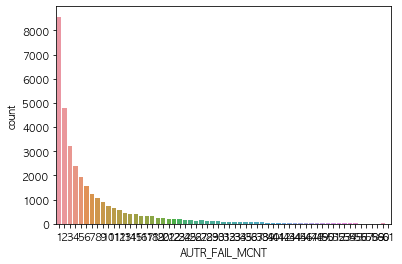

In [164]:
test = df[df['AUTR_FAIL_MCNT']>0]
sns.countplot(data =test, x = 'AUTR_FAIL_MCNT')

# 가구총지급보험금액

In [165]:
df['FYCM_PAID_AMT'].describe()

count    8.986600e+04
mean     4.061977e+06
std      1.454875e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+05
75%      1.900000e+06
max      3.001000e+08
Name: FYCM_PAID_AMT, dtype: float64

In [166]:
df['FYCM_PAID_AMT'].value_counts()

0            35425
100000        3905
200000        3712
300000        3113
400000        2761
             ...  
145000000        6
58500000         6
59100000         6
58200000         5
59700000         3
Name: FYCM_PAID_AMT, Length: 463, dtype: int64

In [174]:
df[df['FYCM_PAID_AMT']<100000][df['FYCM_PAID_AMT']>0][['FYCM_PAID_AMT']]

,FYCM_PAID_AMT


# 보험금 청구건수 = 0인데, 가구 총지급보험금액이 0이 아닌 것  

In [176]:
df[df['FMLY_CLAM_CNT']==0][df['FYCM_PAID_AMT']!=0][['FMLY_CLAM_CNT', 'FYCM_PAID_AMT']]

,FMLY_CLAM_CNT,FYCM_PAID_AMT
4,0,800000
10,0,32400000
25,0,100000
39,0,600000
52,0,22800000
...,...,...
89836,0,6000000
89856,0,63500000
89861,0,700000
89862,0,100000


In [195]:
df[df['FYCM_PAID_AMT']>=100000000][['FMLY_CLAM_CNT', 'FYCM_PAID_AMT']]

,FMLY_CLAM_CNT,FYCM_PAID_AMT
28,37,105000000
599,18,105000000
606,0,225000000
982,17,150000000
1335,24,120000000
...,...,...
88985,36,200000000
89300,23,300100000
89567,8,150000000
89683,22,105000000


In [187]:
test = df[df['FMLY_CLAM_CNT']!=0][df['FYCM_PAID_AMT']!=0][['FMLY_CLAM_CNT', 'FYCM_PAID_AMT']]
test

,FMLY_CLAM_CNT,FYCM_PAID_AMT
2,2,500000
3,1,300000
7,1,300000
11,1,100000
15,3,300000
...,...,...
89851,10,11800000
89852,12,6700000
89853,25,12600000
89855,20,5700000


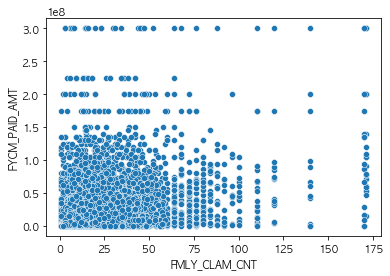

In [197]:
sns.scatterplot(data = test, x = 'FMLY_CLAM_CNT', y ='FYCM_PAID_AMT');

In [189]:
test['FYCM_PAID_AMT'].describe()

count    4.759300e+04
mean     6.692837e+06
std      1.814336e+07
min      1.000000e+05
25%      5.000000e+05
50%      1.400000e+06
75%      4.300000e+06
max      3.001000e+08
Name: FYCM_PAID_AMT, dtype: float64

In [198]:
money_range = []
for money in df['FYCM_PAID_AMT'] :
    if money <1000000 :
        money_range.append(1)
    elif money <2000000 :
        money_range.append(2)
    elif money <3000000 :
        money_range.append(3)
    elif money <4000000 :
        money_range.append(4)
    elif money <5000000 :
        money_range.append(5)
    elif money <6000000 :
        money_range.append(6)
    elif money <7000000 :
        money_range.append(7)
    elif money <100000000 :
        money_range.append(8)
    elif money <200000000 :
        money_range.append(9)
    else : 
        money_range.append(10)

In [203]:
df.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln,money_range
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,3,420001,0,0,1,1,1,1,0,1
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,0,0,0,0,0,4,0,1,0,1
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,0,0,0,0,0,4,0,1,0,1
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,1,6001,0,0,1,4,0,1,1,1


In [200]:
df['money_range'] = money_range

In [210]:
round(df['FMLY_CLAM_CNT'].groupby(df['money_range']).mean())

money_range
1      1.0
2      5.0
3      7.0
4      9.0
5     10.0
6     11.0
7     12.0
8     16.0
9     32.0
10    43.0
Name: FMLY_CLAM_CNT, dtype: float64

In [208]:
df[df['FMLY_CLAM_CNT']==0][df['FYCM_PAID_AMT']!=0][['FMLY_CLAM_CNT','money_range']]

,FMLY_CLAM_CNT,money_range
4,0,1
10,0,8
25,0,1
39,0,1
52,0,8
...,...,...
89836,0,7
89856,0,8
89861,0,1
89862,0,1


In [209]:
idx = df[df['FMLY_CLAM_CNT']==0][df['FYCM_PAID_AMT']!=0].index
idx

Int64Index([    4,    10,    25,    39,    52,    55,    60,    62,    75,
               79,
            ...
            89806, 89807, 89812, 89816, 89830, 89836, 89856, 89861, 89862,
            89865],
           dtype='int64', length=6848)

In [211]:
for i in idx :
    ok = df['money_range'][i]
    if ok == 1 : 
        df['FMLY_CLAM_CNT'][i] = 1
    elif ok == 2 :
        df['FMLY_CLAM_CNT'][i] = 5
    elif ok == 3 :
        df['FMLY_CLAM_CNT'][i] = 7
    elif ok == 4 :
        df['FMLY_CLAM_CNT'][i] = 9
    elif ok == 5 :
        df['FMLY_CLAM_CNT'][i] = 10
    elif ok == 6 :
        df['FMLY_CLAM_CNT'][i] = 11
    elif ok == 7 :
        df['FMLY_CLAM_CNT'][i] = 12
    elif ok == 8 :
        df['FMLY_CLAM_CNT'][i] = 16
    elif ok == 9 :
        df['FMLY_CLAM_CNT'][i] = 32
    else :
        df['FMLY_CLAM_CNT'][i] = 43

In [212]:
df[df['FMLY_CLAM_CNT']==0][df['FYCM_PAID_AMT']!=0]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln,money_range


In [213]:
df['AGE'].value_counts()

45    17319
50    16020
55    13736
40    13517
35    10974
60     8111
30     4917
65     2702
25     2052
70      305
20      213
Name: AGE, dtype: int64

In [214]:
df['SEX'].value_counts()

2    49039
1    40827
Name: SEX, dtype: int64

In [215]:
df.drop(['money_range'], axis=1, inplace=True)

In [216]:
df.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,121,0,0,0,0,0,4,0,1,0
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,121,0,0,0,0,0,4,0,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1


In [217]:
df.to_csv("Fin_Total_0823.csv", index= False)

In [218]:
aaa = pd.read_csv('~/Desktop/Fin_Total_0823.csv')

In [219]:
aaa.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,...,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year,Auto_fail_cnt,Category,Pos_loan,Yn_ovdu,Yn_stln
0,1,공무원,5400,7700,4,1,24.0,0,0,0,...,13,3,420001,0,0,1,1,1,1,0
1,3,주부,3600,4900,4,1,34.0,0,0,0,...,121,0,0,0,0,0,4,0,1,0
2,5,공무원,4800,4800,4,1,14.0,0,0,0,...,97,0,0,0,0,0,1,1,0,1
3,6,3차산업 종사자,4400,7700,2,2,0.0,3300,0,0,...,121,0,0,0,0,0,4,0,1,0
4,7,주부,3600,7700,5,3,19.0,4400,1,200106,...,121,1,6001,0,0,1,4,0,1,1
